In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVC

In [3]:
dataset= pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,0.0
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0


In [5]:
dataset.isnull().sum()

User ID            27
Gender             36
Age                30
EstimatedSalary    16
Purchased          11
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          373 non-null    float64
 1   Gender           364 non-null    object 
 2   Age              370 non-null    float64
 3   EstimatedSalary  384 non-null    float64
 4   Purchased        389 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


In [6]:
dataset= dataset.dropna(axis=0,how='all')

In [7]:
dataset.isnull().sum()

User ID            16
Gender             25
Age                19
EstimatedSalary     5
Purchased           0
dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
gender=pd.get_dummies(dataset.Gender,drop_first=True)

In [10]:
df =pd.concat([gender,dataset],axis=1)

In [11]:
df.drop(columns='Gender',axis=1,inplace=True)

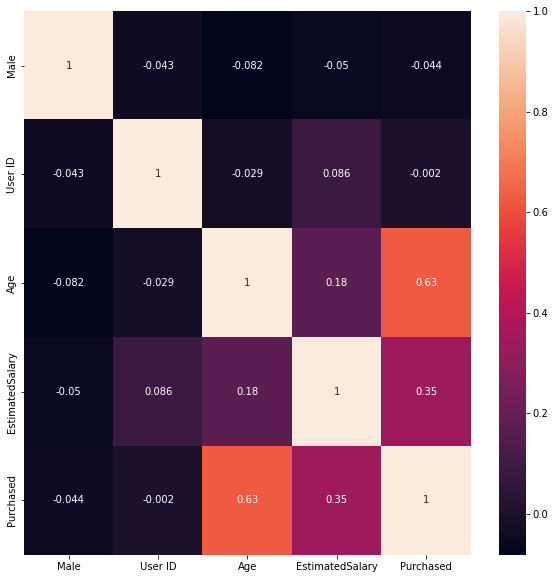

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [12]:
df.drop(columns='Male',axis=1,inplace=True)

In [13]:
df.drop(columns='User ID',axis=1,inplace=True)

In [14]:
df['EstimatedSalary']=df['EstimatedSalary'].fillna(0)

In [15]:
df['Age']=df['Age'].fillna(method='ffill')

In [16]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
df.drop(columns='Male',axis=1,inplace=True)

In [17]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [18]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1].values


In [ ]:
df.reset_index()

In [20]:
from sklearn.preprocessing import  StandardScaler
standscale= StandardScaler()

In [21]:
x=standscale.fit_transform(x)


In [22]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=8)

In [23]:
model=SVC(kernel='linear')

In [24]:
y_train

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [25]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
y_pred=model.predict(x_test)

In [27]:
y_pred

array([1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 1.])

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm =confusion_matrix(y_test,y_pred)

In [29]:
cm

array([[41,  6],
       [ 9, 22]])

In [30]:
accuracy_score(y_test,y_pred)

0.8076923076923077

In [31]:
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85        47
         1.0       0.79      0.71      0.75        31

    accuracy                           0.81        78
   macro avg       0.80      0.79      0.80        78
weighted avg       0.81      0.81      0.81        78

